Dr Sharif Zarchi
-------

Linear Rigression

--------------------------------------Som of Squared Error------------------------------------

SSE = ( Y(i) - Y(predict))**2

Min_SSE = W0 + W1.X

w1 =(n sum x(i) y(i) -XY) / (n sum x(i)**2 - X**2)

w0 = Y - w1X / n

n = len(x)

X = sum of inputs

Y = sum of outputs

---------------------------Simple_Regression---------------------------------

__________________________________________________________________________________________________

In [1]:
x = [5, 3, -1, 2, 6]
y = [14, 6, -5.5, 3.5, 18]

In [3]:
X, Y, XiYi, Xi2 = 0, 0, 0, 0
n = len(x)
for i in range(n):
    X += x[i]
    Y += y[i]
    XiYi += x[i] * y[i]
    Xi2 += x[i] ** 2
print(X, Y, XiYi, Xi2)


15 36.0 208.5 75


In [8]:
w1 = (n * XiYi - X*Y) / (n * Xi2 - X **2)
w0 = (Y - w1 * X) / n
print(w1 , w0)

3.35 -2.85


In [9]:
# cost 
cost = 0
for i in range(n):
    cost += (y[i] - (w0 + w1 * x[i])) ** 2
cost /= n  

print("Cost (Mean Squared Error):", cost)

Cost (Mean Squared Error): 0.5250000000000006


_______________________________________________________________________________________________________________________________________________________

-----------------------------------Rigrsssion Wiht Lib---------------------------------------------

[13.9   7.2  -6.2   3.85 17.25]
w0 (Intercept): -2.8499999999999988
w1 (Slope): 3.3499999999999996
Cost (Mean Squared Error): 0.5249999999999997


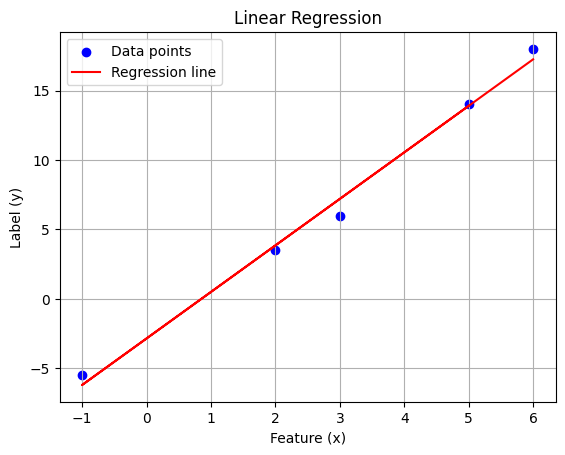

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Define the data
# Input data (feature and label)
x = np.array([5, 3, -1, 2, 6]).reshape(-1, 1)  # Feature (reshaped to 2D)
y = np.array([14, 6, -5.5, 3.5, 18])           # Labels

# Step 2: Create the model
model = LinearRegression()

# Step 3: Train the model
model.fit(x, y)

# Step 4: Make predictions
predictions = model.predict(x)
print(predictions)
# Step 5: Calculate the cost (Mean Squared Error)
cost = mean_squared_error(y, predictions)

# Step 6: Display the results
w0 = model.intercept_  # Intercept (w0)
w1 = model.coef_[0]    # Slope (w1)

print("w0 (Intercept):", w0)
print("w1 (Slope):", w1)
print("Cost (Mean Squared Error):", cost)

# Step 7: Visualize the results
plt.scatter(x, y, color='blue', label='Data points')  # Original data points
plt.plot(x, predictions, color='red', label='Regression line')  # Regression line
plt.title('Linear Regression')
plt.xlabel('Feature (x)')
plt.ylabel('Label (y)')
plt.legend()
plt.grid()
plt.show()

We changed the input to 2D because of the library used, otherwise this lesson was for 1D like the first code where we did everything manually.

___________________________________________________________________________________________________________________________________________________


d = n
=

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

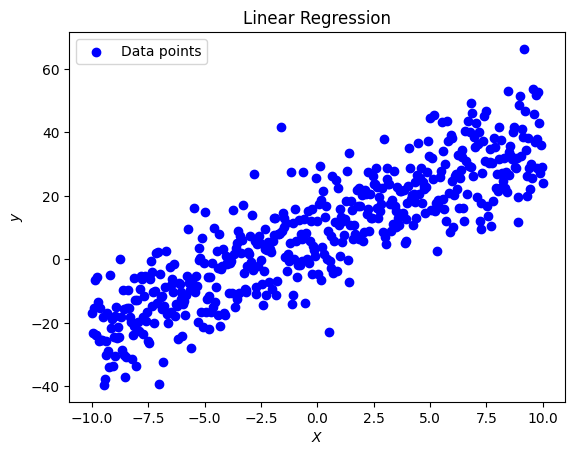

In [8]:
def generate_data( n = 50 , noise= 10):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    #  y = 3x + 8
    slope = 3
    intercept = 8
    noise = np.random.randn(n) * noise
    y = slope * X + intercept + noise
    return X , y


X , y = generate_data( n = 500 , noise= 10)

plt.scatter(X, y, color='blue', label='Data points')  # Original data points
plt.title('Linear Regression')
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [21]:
def h_w(X, w):
    return w[0] + w[1] * X
#Linear_Regrssion_closed_form
def Linear_Regression_closed_form(X, y):
    #Adding  bias term (x_0 = 1 ) to input vactor x 
    x_b = np.c_[np.ones((len(X), 1)), X]
    #w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
    return w
w = Linear_Regression_closed_form(X,y)
print(w[1], w[0])
y_pred = h_w(X, w)

3.036948686465866 8.068379945886472


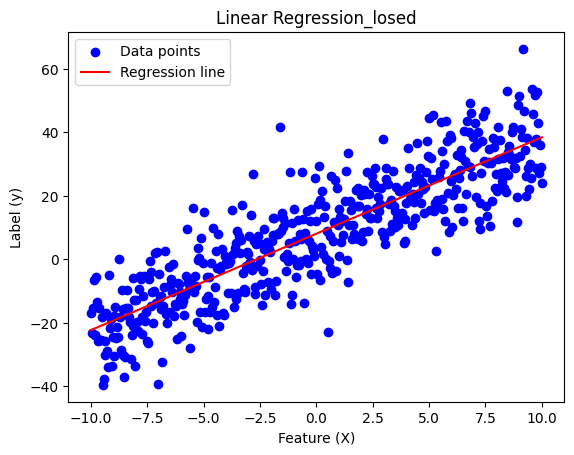

In [22]:
plt.scatter(X, y, color='blue', label='Data points')  # Original data points
plt.plot(X, y_pred, color='red', label='Regression line')  # Regression line
plt.title('Linear Regression_losed')
plt.xlabel('Feature (X)')
plt.ylabel('Label (y)')
plt.legend()
plt.show()

____________

Polynomial Regression
=

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# تولید داده‌های مصنوعی
np.random.seed(42)
x = np.linspace(-3, 3, 100)  # 100 نقطه بین -3 و 3
y = 2 * x**3 - 4 * x**2 + 3 * x + np.random.randn(100) *7  # تابع چند جمله‌ای با نویز

# تبدیل داده‌ها به شکل مناسب برای رگرسیون چند جمله‌ای
x = x.reshape(-1, 1)  # تبدیل به آرایه 2 بعدی
poly = PolynomialFeatures(degree=3)  # تعیین درجه چند جمله‌ای
x_poly = poly.fit_transform(x)  # تبدیل داده‌ها به ویژگی‌های چند جمله‌ای

# آموزش مدل رگرسیون خطی بر روی داده‌های چند جمله‌ای
model = LinearRegression()
model.fit(x_poly, y)

# پیش‌بینی مقادیر
y_pred = model.predict(x_poly)



In [32]:
cost = mean_squared_error(y, y_pred)

print("Cost (Mean Squared Error):", cost)


Cost (Mean Squared Error): 37.84535576506959


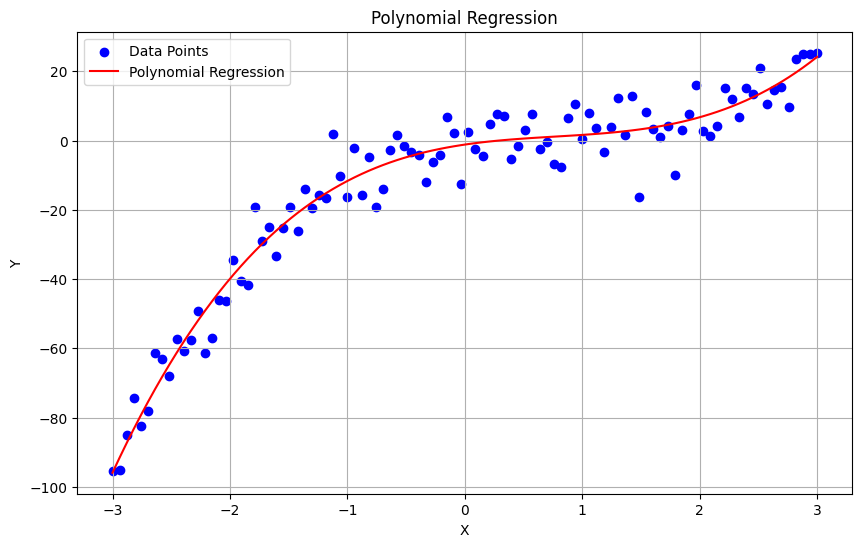

In [33]:
# رسم داده‌ها و نتایج مدل
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')  # نقاط داده
plt.plot(x, y_pred, color='red', label='Polynomial Regression')  # خط رگرسیون
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()